# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [123]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [124]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low= -bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [125]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [126]:
# YOUR CODE HERE

# create the column of ones
ones_column = np.ones(X.shape[0])

# add new column to X
X = np.column_stack((ones_column, X))

# preview results
X[:5]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [127]:
# 2 - print shape of array
print(X.shape)

(70, 2)


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [128]:
# YOUR CODE HERE

# Split the X and Y into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
 
# Print shape of each resulting array
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape = }")

X_train.shape = (56, 2)
X_test.shape = (14, 2)
Y_train.shape = (56,)
Y_test.shape = (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

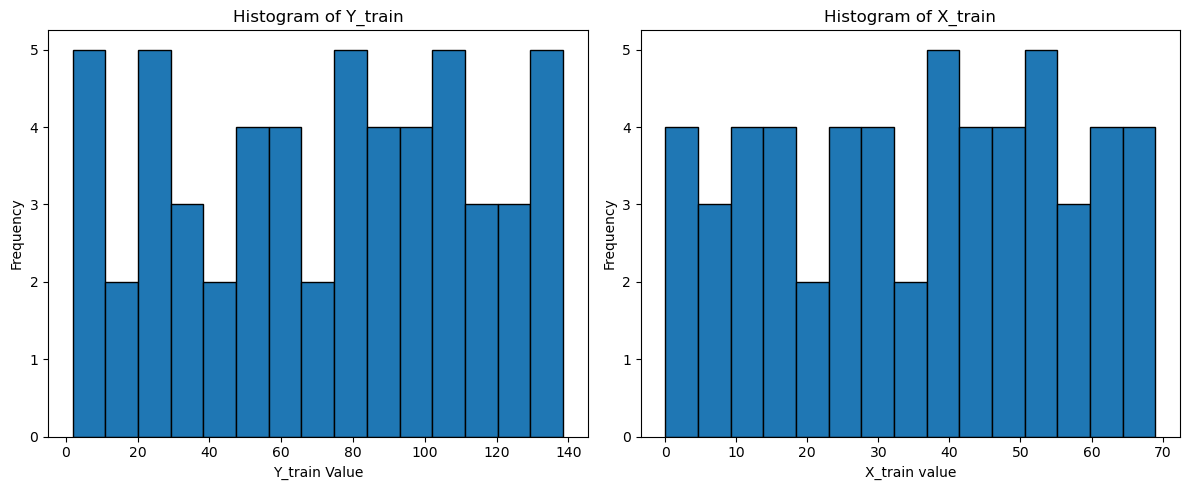

In [129]:
# YOUR CODE HERE

# Plotting histograms
plt.figure(figsize=(12, 5))

# Histogram for Y_train (left side)
plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=15, edgecolor='black')
plt.title('Histogram of Y_train')
plt.xlabel('Y_train Value')
plt.ylabel('Frequency')


# Histogram for X_train (right side)
plt.subplot(1, 2, 2)
# need to isolate the second column of X_train which represents the original X values, because the first column is all ones
plt.hist(X_train[:, 1],  bins=15, edgecolor='black')
plt.title('Histogram of X_train')
plt.xlabel('X_train value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [130]:
# YOUR CODE HERE

def M1(x):
    params = np.array([5,1])
    return np.dot(x, params)

def M2(x):
    params = np.array([1,2])
    return np.dot(x, params)

M1_hat_train = M1(X_train)
M2_hat_train = M2(X_train)

# verify that the shapes match
print(f"{Y_train.shape = }")
print(f"{M1_hat_train.shape = }")
print(f"{M2_hat_train.shape = }")

Y_train.shape = (56,)
M1_hat_train.shape = (56,)
M2_hat_train.shape = (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [135]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each \
            row is a training example.
    outputs: A 1-D array containing the real-valued label corresponding \
             to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
"""
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)
    
    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 4). 
    predictions = np.dot(inputs, W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diff**2)
    
    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = (1 / m) * np.dot(diff, inputs)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
    
    # Print the weights and loss after each epoch
    print(f"{epoch = }: {W = }, {loss = }")

  return np.array(weights), np.array(losses)

In [136]:
# YOUR CODE HERE
weights, losses = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=5)

epoch = 0: W = array([1.00709394, 1.33262886]), loss = 1665.3666608648086
epoch = 1: W = array([1.01183193, 1.55469157]), loss = 742.4148662596615
epoch = 2: W = array([1.01499708, 1.7029404 ]), loss = 331.0657262384294
epoch = 3: W = array([1.01711221, 1.80191116]), loss = 147.73208292579974
epoch = 4: W = array([1.01852634, 1.8679839 ]), loss = 66.0223586320446


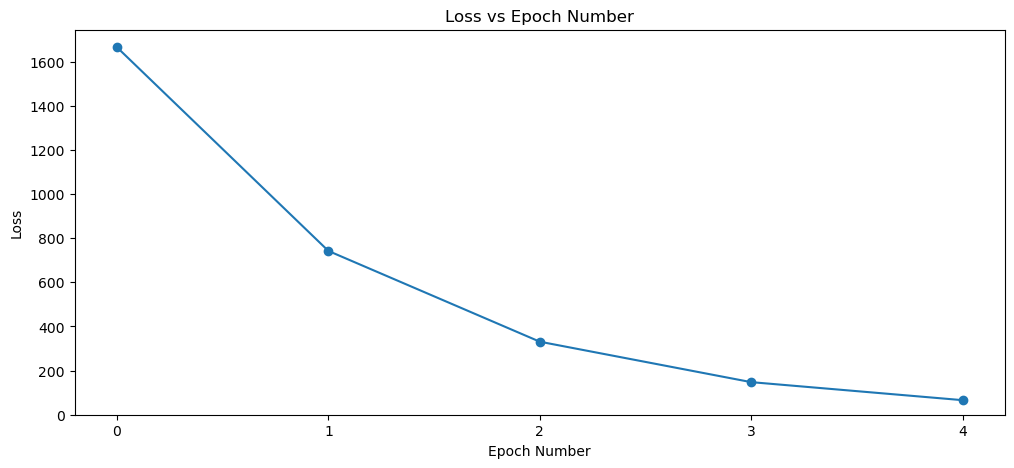

In [137]:
# YOUR CODE HERE

# create the figure
plt.figure(figsize=(12, 5))

# plot the data
plt.plot(range(len(losses)), losses, marker='o')

# decorate the plot
plt.title('Loss vs Epoch Number')
plt.xlabel('Epoch Number')
plt.xticks(range(0,len(losses), 1))
plt.ylabel('Loss')
plt.ylim(bottom=0)

plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

In [138]:
# YOUR ANSWERS HERE
"""
1)  I do not think it will be beneficial to increase the learning rate. This is a very simple model to learn, so 
    increasing the rate that much will cause the model to jump over the loss function minimum. As you can see in
    the plots below, a learning rate of .02 actually makes the loss increase with each epoch. 

2)  I would consider extending the number of epochs becasue the loss is continuing to decrease with a learning 
    rate of .0002 after 5 epochs and will likely continue to decrease if given more time to train. 

For example, here is the final loss after training with the following hpyerparameters: 
learning_rate= .0002, num_epochs= 5  -> 66.02
learning_rate= .02, num_epochs= 5    -> 1943544404976516.2
learning_rate= .0002, num_epochs= 10 -> 1.47
"""
pass

In [139]:
# YOUR CODE HERE

In [140]:
weights0002, losses0002 = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=5)

epoch = 0: W = array([1.00709394, 1.33262886]), loss = 1665.3666608648086
epoch = 1: W = array([1.01183193, 1.55469157]), loss = 742.4148662596615
epoch = 2: W = array([1.01499708, 1.7029404 ]), loss = 331.0657262384294
epoch = 3: W = array([1.01711221, 1.80191116]), loss = 147.73208292579974
epoch = 4: W = array([1.01852634, 1.8679839 ]), loss = 66.0223586320446


In [141]:
weights02, losses02 = gradient_descent(X_train, Y_train, learning_rate=0.02, num_epochs=5)

epoch = 0: W = array([ 1.70939419, 34.26288605]), loss = 1665.3666608648086
epoch = 1: W = array([  -21.14077098, -1038.13576669]), loss = 1730683.4233130235
epoch = 2: W = array([  715.57111348, 33536.08547039]), loss = 1798911746.516617
epoch = 3: W = array([  -23036.06070114, -1081139.68066399]), loss = 1869830168587.4255
epoch = 4: W = array([  742718.54314852, 34856099.64525088]), loss = 1943544404976516.2


In [142]:
weights0002_10, losses0002_10 = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=10)

epoch = 0: W = array([1.00709394, 1.33262886]), loss = 1665.3666608648086
epoch = 1: W = array([1.01183193, 1.55469157]), loss = 742.4148662596615
epoch = 2: W = array([1.01499708, 1.7029404 ]), loss = 331.0657262384294
epoch = 3: W = array([1.01711221, 1.80191116]), loss = 147.73208292579974
epoch = 4: W = array([1.01852634, 1.8679839 ]), loss = 66.0223586320446
epoch = 5: W = array([1.01947249, 1.91209397]), loss = 29.60526166333263
epoch = 6: W = array([1.02010622, 1.94154177]), loss = 13.374574644284786
epoch = 7: W = array([1.02053137, 1.96120106]), loss = 6.14074143396102
epoch = 8: W = array([1.02081727, 1.97432553]), loss = 2.9167038563240735
epoch = 9: W = array([1.02101022, 1.98308738]), loss = 1.479786682981072


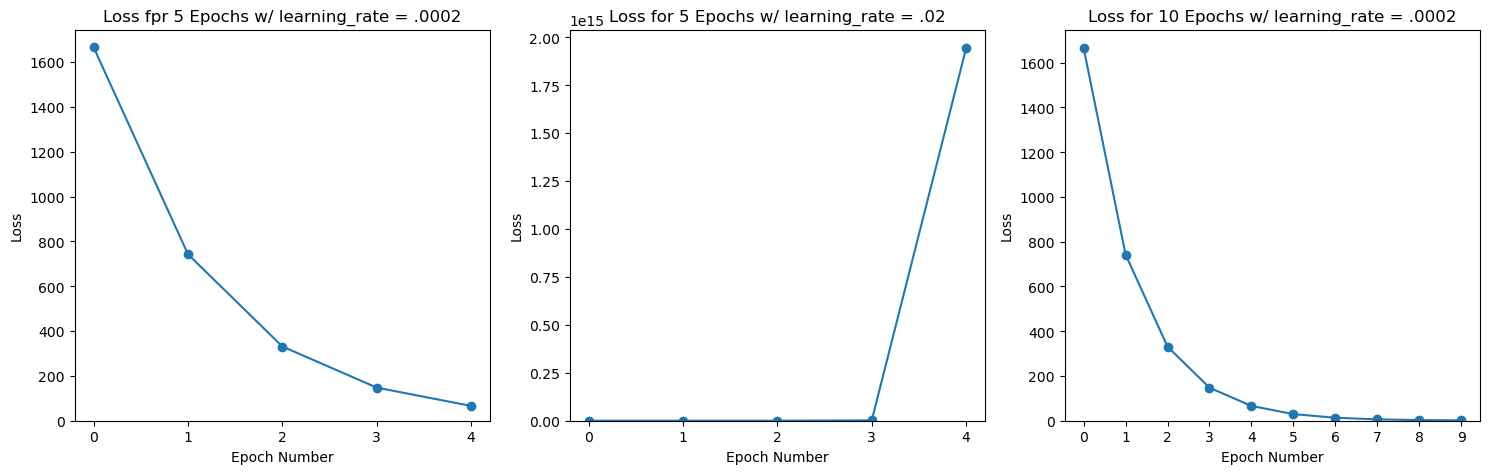

In [145]:
# Plots
plt.figure(figsize=(15, 5))

# plot the original data with learning rate = .0002
plt.subplot(1, 3, 1)
plt.plot(range(len(losses0002)), losses0002, marker='o')
plt.title('Loss fpr 5 Epochs w/ learning_rate = .0002')
plt.xlabel('Epoch Number')
plt.xticks(range(0,len(losses0002), 1))
plt.ylabel('Loss')
plt.ylim(bottom=0)

# plot the original data with learning rate = .0002
plt.subplot(1, 3, 2)
plt.plot(range(len(losses02)), losses02, marker='o')
plt.title('Loss for 5 Epochs w/ learning_rate = .02')
plt.xlabel('Epoch Number')
plt.xticks(range(0,len(losses02), 1))
plt.ylabel('Loss')
plt.ylim(bottom=0)

# plot the original data with learning rate = .0002 and 10 epochs
plt.subplot(1, 3, 3)
plt.plot(range(len(losses0002_10)), losses0002_10, marker='o')
plt.title('Loss for 10 Epochs w/ learning_rate = .0002')
plt.xlabel('Epoch Number')
plt.xticks(range(0,len(losses0002_10), 1))
plt.ylabel('Loss')
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [96]:
# YOUR ANSWER HERE

# These weights make up the best model so far:
weights, losses = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=10)
best_weights = weights[-1, :]

def M3(X):
    params = best_weights
    return np.dot(X, params)

epoch = 0: W = array([1.00709394, 1.33262886]), loss = 1665.3666608648086
epoch = 1: W = array([1.01183193, 1.55469157]), loss = 742.4148662596615
epoch = 2: W = array([1.01499708, 1.7029404 ]), loss = 331.0657262384294
epoch = 3: W = array([1.01711221, 1.80191116]), loss = 147.73208292579974
epoch = 4: W = array([1.01852634, 1.8679839 ]), loss = 66.0223586320446
epoch = 5: W = array([1.01947249, 1.91209397]), loss = 29.60526166333263
epoch = 6: W = array([1.02010622, 1.94154177]), loss = 13.374574644284786
epoch = 7: W = array([1.02053137, 1.96120106]), loss = 6.14074143396102
epoch = 8: W = array([1.02081727, 1.97432553]), loss = 2.9167038563240735
epoch = 9: W = array([1.02101022, 1.98308738]), loss = 1.479786682981072


---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [148]:
# YOUR CODE HERE
# NOTE: I'm assuming there is a typo in the question and we should be computing the MSE of the 3 models on the TEST dataset, not the TRAINING dataset...? 

mse1 = mean_squared_error(Y_train, M1(X_train))
mse2 = mean_squared_error(Y_train, M2(X_train))
mse3 = mean_squared_error(Y_train, M3(X_train))

print(f"{mse1 = }")
print(f"{mse2 = }")
print(f"{mse3 = }")

mse1 = 1397.608983658733
mse2 = 0.3280557752885262
mse3 = 1.479786682981072


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [149]:
# YOUR CODE HERE

# M2 demonstrates the best generalization ability, given that it has the smallest loss on the unseen test data among the 3 models. M3 also shows very good generalizability, but it is not as good as M2. 

mse1 = mean_squared_error(Y_test, M1(X_test))
mse2 = mean_squared_error(Y_test, M2(X_test))
mse3 = mean_squared_error(Y_test, M3(X_test))

print(f"{mse1 = }")
print(f"{mse2 = }")
print(f"{mse3 = }")

mse1 = 1113.6003911560044
mse2 = 0.2908006971666422
mse3 = 1.066053488198779


----
#### <span style="color:chocolate">Bonus question</span> (20 points)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [99]:
# YOUR ANSWER HERE

# GD is implemented above and it calculates the gradient based on the entire training set before updating the weights in each epoch. 
# SDG is different because it calculates the gradient and updates the weights for each training example, one at a time, for each epoch.  


In [120]:
import numpy as np

def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs):
    """Apply the gradient descent algorithm to learn linear regression.

    Args:
        inputs: A 2-D array where each column is an input feature and each \
            row is a training example.
        outputs: A 1-D array containing the real-valued label corresponding \
            to the input data in the same row.
        learning_rate: The learning rate to use for updates.
        num_epochs: The number of passes through the full training data.

    Returns:
        weights: A 1-D array with the learned weights after the final training epoch.
        losses: A 1-D array with the loss after the final training epoch.
    """
    inputs = inputs.copy()

    num_examples, num_features = inputs.shape
    weights = np.zeros(num_features)
    losses = []

    for epoch in range(num_epochs):
        # np.random.shuffle(inputs)

        for i in range(num_examples):
            # Select a single training example
            x_i = inputs[i]
            y_i = outputs[i]
            
            # Calculate the prediction
            prediction = np.dot(x_i, weights)
            
            # Calculate the error
            error = prediction - y_i
            
            # Update the weights
            gradient = error * x_i
            weights -= learning_rate * gradient
        
        # Calculate loss for the current epoch
        predictions = np.dot(inputs, weights)
        loss = np.mean((predictions - outputs) ** 2)
        losses.append(loss)
        
        # Optional: print the loss for every epoch (can be removed if not needed)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')

    return weights, losses


In [121]:
optimal_weights, l = stochastic_gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=10)

print(f"\n{optimal_weights = }")

Epoch 1/10, Loss: 0.7188
Epoch 2/10, Loss: 0.7172
Epoch 3/10, Loss: 0.7156
Epoch 4/10, Loss: 0.7141
Epoch 5/10, Loss: 0.7125
Epoch 6/10, Loss: 0.7110
Epoch 7/10, Loss: 0.7095
Epoch 8/10, Loss: 0.7080
Epoch 9/10, Loss: 0.7064
Epoch 10/10, Loss: 0.7049

optimal_weights = array([0.06717795, 2.01337497])
